# Quantum Computing Project 1

In [26]:
import numpy as np
import math
import cmath
import scipy.sparse
import sympy
import random
import matplotlib.pyplot as plt

In [118]:
def prettyPrintBinary(state):
    string = '( '
    for i in state:
        string += f'{i[0]} |{i[1]}> + '
    string = string[:-2]
    string += ')'
    return string

def prettyPrintInteger(State):
    string = '( '
    for i in range(len(State)):
        x = 0
        for j in range(len(State[i][1])):
            x += int(State[i][1][j]) * (2**(len(State[i][1]) - (j+1)))
        string += f'{State[i][0]} |{x}> + '
    string = string[:-2]
    string += ')'
    return string

def StateToVec(myState):
    vect = np.zeros(2**len(myState[0][1]),dtype='complex')
    xList,pList = [],[]
    for i in range(len(myState)):
        x = 0
        for j in range(len(myState[i][1])):
            x += int(myState[i][1][j]) * (2**(len(myState[i][1]) - (j+1)))
        xList.append(x)
        pList.append(myState[i][0])
    for k in range(len(xList)):
        for l in range(len(vect)):
            if xList[k] == l:
                vect[l] = pList[k]
    return vect

def VecToBinary(myVec,Note):
    state = '('
    vect = 0
    for i in range(len(myVec)):
        if Note == "Binary":
            var = "{0:b}".format(i)
        elif Note == "Decimal":
            var = i
        if myVec[i] == 0.0:
            continue
        binary = "{0:b}".format(i)
        if myVec[i].imag != 0:
            vect = str(myVec[i].imag) + 'j'
        else:
            vect = myVec[i].real
        state += f'{vect} |{var}> + '
    state = state[:-2]
    state += ')'
    return state

#             tup = (myVec[i],"{0:b}".format(i))
def VecToState(myVec):
    myState = []
    for i in range(len(myVec)):
        if myVec[i] != 0:
            pad = int(np.log2(len(myVec)))
            string = "{0:b}".format(i)
            padding = pad - len(string)
            string = padding*'0' + '{0:b}'.format(i)
            tup = (myVec[i],string)
            myState.append(tup)
    return myState

def CircuitMeasurement(V):
    vectorOut = (abs(V))**2
    probList = [(0,0)]
    z = 0
    for i in range(len(vectorOut)):
        if vectorOut[i] == 0:
            continue
        z = z + vectorOut[i]
        probList.append((z,i))
    randomNum = np.random.uniform()
    for i in range(len(probList) - 1):
        if probList[i][0] <= randomNum <= probList[i+1][0]:
            wire= probList[i+1][1]
    
    for i in range(len(V)):
        if V[i] != 0:
            pad = int(np.log2(len(V)))
            string = "{0:b}".format(wire)
            padding = pad - len(string)
            string = padding*'0' + '{0:b}'.format(wire)   
    return string,f'Circuit Measurement: {string}'

def binaryToDecimal(binary): 
    binary1 = binary 
    decimal, i, n = 0, 0, 0
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return decimal

def phaseEstimation(topWire,string):
    stri = string[:topWire]
    stri = stri[::-1]
    l = 0
    for j in range(len(stri)):
        l += int(stri[j])*(1/(2**(j+1)))
    return l

def Max(array):
    k = 0
    l = 0
    for i in range(len(array)):
        if array[i] >= k:
            k = array[i]
            l = i
    return l,k

In [107]:
myState2=[
(np.sqrt(0.1)*1.j, '101'),
(np.sqrt(0.5), '000') ,
(-np.sqrt(0.4), '010' )
]
print(prettyPrintBinary(myState2))
print(prettyPrintInteger(myState2))
print(StateToVec(myState2))
print(VecToState(StateToVec(myState2)))

( 0.31622776601683794j |101> + 0.7071067811865476 |000> + -0.6324555320336759 |010> )
( 0.31622776601683794j |5> + 0.7071067811865476 |0> + -0.6324555320336759 |2> )
[ 0.70710678+0.j          0.        +0.j         -0.63245553+0.j
  0.        +0.j          0.        +0.j          0.        +0.31622777j
  0.        +0.j          0.        +0.j        ]
[((0.7071067811865476+0j), '000'), ((-0.6324555320336759+0j), '010'), (0.31622776601683794j, '101')]


In [29]:
 def ReadInput(fileName):
        myInput_lines=open(fileName).readlines()
        myInput=[]
        numberOfWires=int(myInput_lines[0])
        for line in myInput_lines[1:]:
            myInput.append(line.split())
        return (numberOfWires,myInput)

def ReadInputState(fileName):
        myInput_lines=open(fileName).readlines()
        myInput=[]
        for line in myInput_lines[0:]:
            myInput.append(line.split())
        for i in range(len(myInput)):
            for j in range(len(myInput[0])):
                myInput[i][j] = float(myInput[i][j])
        k = []
        for i in range(len(myInput)):
            pad = int(np.log2(len(myInput)))
            string = "{0:b}".format(i)
            padding = pad - len(string)
            string = padding*'0' + '{0:b}'.format(i)  
            k.append((complex(myInput[i][0],myInput[i][1]),string))
        return k
            
def Read(fileName):
    myInput_lines=open(fileName).readlines()
    myInput=[]
    for line in myInput_lines[0:]:
        myInput.append(line.split())
    for i in range(len(myInput)):
        myInput[i] = float(myInput[i][0])
    return myInput

In [102]:
phase_estimation_circuit_gen(7)

TypeError: phase_estimation_circuit_gen() missing 2 required positional arguments: 'num' and 'yes'

In [31]:
def InverseQFT(filename):
    num_of_wires,qft = ReadInput(filename)
    inverse_qft = qft[::-1]
    for i in range(len(inverse_qft)):
        if inverse_qft[i][0] == 'CPHASE':
            inverse_qft[i][-1] = '-' + inverse_qft[i][-1]
    return inverse_qft

In [32]:
InverseQFT('QFT_3.txt')

[['H', '0'],
 ['CPHASE', '0', '1', '-1.5707963267948966'],
 ['CPHASE', '0', '2', '-0.7853981633974483'],
 ['H', '1'],
 ['CPHASE', '1', '2', '-1.5707963267948966'],
 ['H', '2']]

In [33]:
def tensorMe(listofMatrices):
    if len(listofMatrices) == 1:
        return listofMatrices
    z = np.kron(listofMatrices[0],listofMatrices[1])
    if len(listofMatrices) > 2:
        for a in listofMatrices[2:]:
            z = np.kron(z,a)
        matrix = z
    else:
        matrix = np.kron(listofMatrices[0],listofMatrices[1])
    return matrix

def HadamardArray(i, k):
    matriceList = []
    I = np.array([[1,0],[0,1]])
    H = (1/np.sqrt(2))*np.array([[1,1],[1,-1]])
    for l in range(k):
        if i == l:
            matriceList.append(H)
        else:
            matriceList.append(I)
    return tensorMe(matriceList)

def PhaseArray(i,k,theta):
    matriceList = []
    I = np.array([[1,0],[0,1]])
    H = np.array([[1,0],[0,np.exp(1j*theta)]])
    for l in range(k):
        if i == l:
            matriceList.append(H)
        else:
            matriceList.append(I)
    return tensorMe(matriceList)

def SWAPmatrix(Wire1,Wire2,k):
    matriceList = []
    I = np.array([[1,0],[0,1]])
#     H = SWAPgate(Wire1,Wire2,k)
    H = [[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]]
    for l in range(k):
        if Wire1 == l:
            matriceList.append(H)
        elif Wire1 != l and Wire2 != l:
            matriceList.append(I)
    return tensorMe(matriceList)

def SWAPgate(wire1,wire2,k):
    Cnot = np.array(longCNOT(wire1,wire2,2))
    Cnot1 = np.array(longCNOT(wire2,wire1,2))
    return Cnot @ (Cnot1) @ Cnot

def CNOTArray(controlWire,otherWire,k):
    matriceList = []
    I = np.array([[1,0],[0,1]])
    if controlWire < otherWire:
        H = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
    else:
        H = np.array([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]])
    for l in range(k):
        if controlWire == l:
            matriceList.append(H)
        elif controlWire != l and otherWire != l:
            matriceList.append(I)
    return tensorMe(matriceList)

def RzGate(i,k,theta):
    P_ = PhaseArray(i,k,theta)
    P_pi = PhaseArray(i,k,np.pi)
    P = PhaseArray(i,k,-theta/2)
    X = NOTgate(i,k)
    return X@P@X@P@P_

def NOTgate(i,k):
    theta = np.pi
    H = np.array(HadamardArray(i,k))
    P = np.array(PhaseArray(i,k,np.pi))
    return H@P@H

def ControlRzGate(control,other,k,theta):
    P_ = PhaseArray(other,k,theta)
    P = PhaseArray(other,k,-theta/2)
    Cnot = longCNOT(control,other,k)
    return Cnot@P@Cnot@P@P_

def Cphase(control,other,k,theta):
    P_ = PhaseArray(control,k,theta)
    P = PhaseArray(control,k,-theta/2)
    Crz = ControlRzGate(control,other,k,theta)
    return  Crz @ P_ @ P

def longCNOT(control,other,k):
    size = 2**k
    Imatrix = np.zeros((size,size))
    for i in range(len(Imatrix)):
        for j in range(len(Imatrix)):
            Imatrix[i][i] = 1
    h = []
    if other < control:
        h.append(HadamardArray(control,k)@HadamardArray(other,k))
        h.append(longCNOT(other,control,k))
        h.append(HadamardArray(control,k)@ HadamardArray(other,k))
        l = Imatrix
        for i in range(len(h)):
            l = l @ h[i]
        return l

    if control == other:
        return "Try again!"
    if other - control == 1:
        return CNOTArray(control,other,k)
    matrixL=[]
    otherMatrixL = []
    for i in range((other-control)-1):
        matrixL.append(((other-i,other-i-1),SWAPmatrix(other-i,other-i-1,k)))
    for i in range(len(matrixL)):
        otherMatrixL.append(matrixL[i])
    matrixL.append(('CNOT',CNOTArray(control,control+1,k)))
    for i in reversed(otherMatrixL):
        matrixL.append(i)
    size = 2**k
    Imatrix = np.zeros((size,size))
    for i in range(len(Imatrix)):
        for j in range(len(Imatrix)):
            Imatrix[i][i] = 1
    for i in range(len(matrixL)):
        Imatrix  = Imatrix @ matrixL[i][1]
    return Imatrix

In [34]:
np.pi/8

0.39269908169872414

In [35]:
N = 5
print(N)
i = 0
k = N-1
while N > i:
    print('H ',N - i - 1)
    if (N - i - 1 == 0):
        break
    j = 0
    while j <= i:
        print('CPHASE ', k -1, N - j -1, np.pi/2**(i-j+1))
        j += 1
    k -= 1
    i += 1

5
H  4
CPHASE  3 4 1.5707963267948966
H  3
CPHASE  2 4 0.7853981633974483
CPHASE  2 3 1.5707963267948966
H  2
CPHASE  1 4 0.39269908169872414
CPHASE  1 3 0.7853981633974483
CPHASE  1 2 1.5707963267948966
H  1
CPHASE  0 4 0.19634954084936207
CPHASE  0 3 0.39269908169872414
CPHASE  0 2 0.7853981633974483
CPHASE  0 1 1.5707963267948966
H  0


In [36]:
def QFT_gen_circuit(N):
    with open(f'QFT_{N}.txt','w') as file:
        file.write(f'{N}')
        file.write('\n')
        i = 0
        k = N - 1
        while N > i:
            file.write('H ')
            file.write(f'{N - i - 1}')
            file.write('\n')
            if (N - i - 1 == 0):
                break
            j = 0
            while j <= i:
                file.write('CPHASE ')
                file.write(f'{k - 1} ')
                file.write(f'{N - j - 1} ')
                file.write(f'{np.pi/2**(i - j + 1)}')
                j += 1
                file.write('\n')
            k -= 1
            i += 1
    return 0;

In [13]:
QFT_gen_circuit(8)

0

In [12]:
QFT_gen_circuit(5)

0

In [37]:
def random_gen(N):
    wireList = []
    for i in range(N):
        wireList.append(i)
    with open('randCircuit.txt', 'w') as file:
        file.write(f'{N}')
        file.write('\n')
        for i in range(50):
            rand_gate = random.randint(1,3)
            rand_position = random.randint(0,N-1)
            rand_first_cnot = random.randint(0,N//2)
            rand_last_cnot = random.randint(N//2,N-1)
            if rand_first_cnot == rand_last_cnot:
                rand_first_cnot = 0
            rand_theta = random.uniform(0,6)
            if N > 1:
                if rand_gate == 1:
                    file.write('H')
                    file.write(f' {rand_position}')
                    if i < 49:
                        file.write('\n')
                elif rand_gate == 2:
                    file.write('CNOT')
                    file.write(f' {rand_first_cnot}')
                    file.write(f' {rand_last_cnot}')
                    if i < 49:
                        file.write('\n')
                elif rand_gate == 3:
                    file.write('P')
                    file.write(f' {rand_position}')
                    file.write(f' {rand_theta}')
                    if i < 49:
                        file.write('\n')
            else:
                if rand_gate == 1:
                    file.write('H')
                    file.write(f' {rand_position}')
                    if i < 49:
                        file.write('\n')
                elif rand_gate == 3:
                    file.write('P')
                    file.write(f' {rand_position}')
                    file.write(f' {rand_theta}')
                    if i < 49:
                        file.write('\n')
    return 0

In [22]:
print(random_gen(5))

0


Text(0.5, 1.0, 'Time vs Qubits')

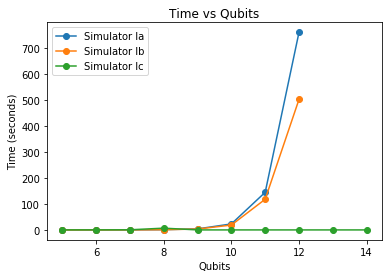

In [1426]:
plt.plot(range(5,13),simA,'-o',label='Simulator Ia')
plt.plot(range(5,13),simB,'-o',label="Simulator Ib")
plt.plot(range(5,15),simC[5:15],'-o',label="Simulator Ic")
plt.legend()
plt.xlabel("Qubits")
plt.ylabel("Time (seconds)")
plt.title("Time vs Qubits")

In [1434]:
alist,blist,clist = [],[],[]
for i in range(4):
    alist.append(62)
    blist.append(62)
for i in range(10):
    clist.append(62)
alist.append(63)
alist.append(67)
alist.append(85)
alist.append(92)
alist.append(93)
blist.append(62)
blist.append(63)
blist.append(82)
blist.append(86)
blist.append(90)

Text(0.5, 1.0, 'RAM vs Qubits')

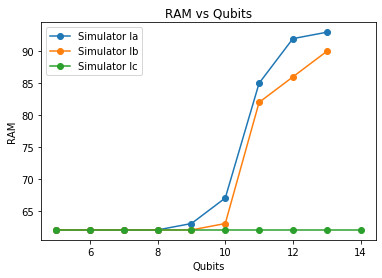

In [1437]:
plt.plot(range(5,14),alist,'-o',label='Simulator Ia')
plt.plot(range(5,14),blist,'-o',label="Simulator Ib")
plt.plot(range(5,15),clist,'-o',label="Simulator Ic")
plt.legend()
plt.xlabel("Qubits")
plt.ylabel("RAM")
plt.title("RAM vs Qubits")

In [ ]:
plt.plot(range(5,13),simA,'-o',label='Simulator Ia')
plt.plot(range(5,13),simB,'-o',label="Simulator Ib")
plt.plot(range(5,15),simC[5:15],'-o',label="Simulator Ic")
plt.legend()
plt.xlabel("Qubits")
plt.ylabel("Time (seconds)")
plt.title("Time vs Qubits")

In [ ]:
import time
simA = []
simB = []
simC = []
for i in range(5,13):
    print(i)
    random_gen(i)
    string = ''
    for i in range(i):
        string += '0'
    start_time_Ia = time.time()
    QuantumSimulatorIa([(1,string)],'randCircuit.txt')
    simA.append(time.time() - start_time_Ia)
    print("A ",time.time() - start_time_Ia)

    start_time_Ib = time.time()
    QuantumSimulatorIb([(1,string)],'randCircuit.txt')
    simB.append(time.time() - start_time_Ib)
    print("B ",time.time() - start_time_Ib)

    start_time_Ic = time.time()
    QuantumSimulatorIc([(1,string)],'randCircuit.txt')
    simC.append(time.time() - start_time_Ic)
    print("C ",time.time() - start_time_Ic)

random_gen(15)
string = ''
for i in range(15):
    string += '0'
start_time_Ic = time.time()
QuantumSimulatorIc([(1,string)],'randCircuit.txt')
simC.append(time.time() - start_time_Ic)

## Quanum Simulator Ia

In [38]:
def QuantumSimulatorIa(State,fileName):
    numberOfWires,myInput = ReadInput(fileName)
    matrixList = []
    size = 2**int(numberOfWires)
    newMatrix = np.zeros((size,size),dtype = 'complex')
    
    for i in range(len(newMatrix)):
        for j in range(len(newMatrix[i])):
            newMatrix[i][i] = 1
#     print(type(newMatrix[0][0]))
    for i in range(len(myInput)):
        if myInput[i][0] == 'H':
            matrixList.append(HadamardArray(int(myInput[i][1]),numberOfWires))
        if myInput[i][0] == 'CNOT':
            matrixList.append(longCNOT(int(myInput[i][1]),int(myInput[i][2]),numberOfWires))
        if myInput[i][0] == 'P':
            matrixList.append(PhaseArray(int(myInput[i][1]),numberOfWires,float(myInput[i][2])))
        if myInput[i][0] == 'INITSTATE':
            State = ReadInputState(myInput[i][2]) 
        if myInput[i][0] == 'CPHASE':
            matrixList.append(Cphase(int(myInput[i][1]),int(myInput[i][2]),numberOfWires,float(myInput[i][3])))
#         if myInput[i][1] == 'BASIS':
#             State  = (1,myInput[i][1])
            
    for i in reversed(matrixList):
        newMatrix = newMatrix @ i
        
    if type(State[0]) == tuple:
        VectorInput = StateToVec(State)
    elif type(State[0]) == complex:
        VectorInput = State
        
    VectorOutput = newMatrix@VectorInput
    for i in range(len(myInput)):
        if myInput[i][0] == 'MEASURE':
            out = CircuitMeasurement(VectorOutput)
        else:
            out = VecToState(VectorOutput)
    return out

In [39]:
QuantumSimulatorIa([(1,'00000')],'measure.circuit')

('11000', 'Circuit Measurement: 11000')

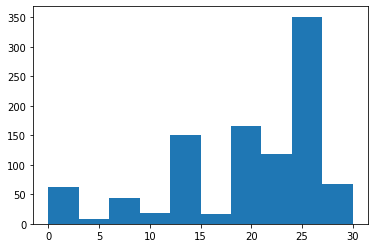

In [47]:
binary_list = []
for i in range(1000):
    binary_list.append(binaryToDecimal(int(QuantumSimulatorIa([(1,'00000')],'measure.circuit')[0])))
plt.hist(binary_list);

(array([ 38.,   0.,   0.,  16.,   0.,   0.,   8.,   0.,   0.,   0.,   0.,
          0.,   0.,   6.,   0.,   0.,   2.,   0.,   0.,   0.,   3.,   0.,
          0.,   2.,   0.,   0.,  38.,   0.,   0.,   0.,  14.,   0.,   0.,
          3.,   0.,   0.,   2.,   0.,   0.,   0.,  78.,   0.,   0.,  52.,
          0.,   0.,  21.,   0.,   0.,   0.,   8.,   0.,   0.,   7.,   0.,
          0.,   1.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,
        162.,   0.,   0.,   0.,  73.,   0.,   0.,  29.,   0.,   0.,  16.,
          0.,   0.,   0., 185.,   0.,   0., 116.,   0.,   0.,  50.,   0.,
          0.,   0.,  17.,   0.,   0.,  33.,   0.,   0.,  16.,   0.,   0.,
          1.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ,
         3.3,  3.6,  3.9,  4.2,  4.5,  4.8,  5.1,  5.4,  5.7,  6. ,  6.3,
         6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ,  9.3,  9.6,
         9.9, 10.2, 10.5, 10.8, 11.1, 11.4, 11.7, 12. , 12.3, 12.6, 12.9,
        13.2, 13.5, 13

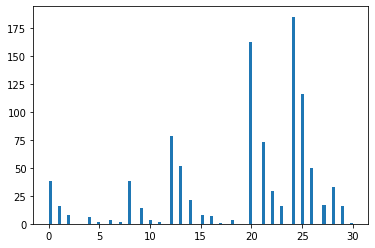

In [48]:
plt.hist(binary_list,bins=100)

In [49]:
# QuantumSimulatorIb([(1,'00000')],'rand (1).circuit')

In [75]:
def qft(fileName,numberOfWires):
    matrixList = []
    numberOfWires,myInput = ReadInput(fileName)
    size = 2**int(numberOfWires)
    newMatrix = np.zeros((size,size),dtype = 'complex')
    
    for i in range(len(newMatrix)):
        for j in range(len(newMatrix[i])):
            newMatrix[i][i] = 1   
    myInput = myInput[::-1]
    for i in range(len(myInput)):
        if myInput[i][0] == 'H':
            matrixList.append(HadamardArray(int(myInput[i][1]),numberOfWires))
        if myInput[i][0] == 'CPHASE':
            matrixList.append(Cphase(int(myInput[i][1]),int(myInput[i][2]),numberOfWires,-float(myInput[i][3])))
    
    for i in reversed(matrixList):
        newMatrix = (newMatrix @ i)
    return newMatrix

In [52]:
# SWAPmatrix(0,2,3)

In [53]:
# qft('QFT_test.txt',3)

## Quantum Simulator Ib

In [216]:
def QuantumSimulatorIb(State,fileName):
    numberOfWires,myInput = ReadInput(fileName)
    outList = []
    size = 2**int(numberOfWires)
    matrixList = []
    newMatrix = np.zeros((size,size),dtype = 'complex')
    
    for i in range(len(newMatrix)):
        for j in range(len(newMatrix[i])):
            newMatrix[i][i] = 1      
            
    for i in range(len(myInput)):
        if myInput[i][0] == 'H':
            matrixList.append(HadamardArray(int(myInput[i][1]),numberOfWires))
        if myInput[i][0] == 'CNOT':
            matrixList.append(longCNOT(int(myInput[i][1]),int(myInput[i][2]),numberOfWires))
        if myInput[i][0] == 'P':
            matrixList.append(PhaseArray(int(myInput[i][1]),numberOfWires,float(myInput[i][2])))
        if myInput[i][0] == 'CPHASE':
            matrixList.append(Cphase(int(myInput[i][1]),int(myInput[i][2]),numberOfWires,float(myInput[i][3])))
        if myInput[i][0] == 'cPHASE':
            matrixList.append(Cphase(int(myInput[i][1]),int(myInput[i][2]),numberOfWires,float(myInput[i][3])))
        if myInput[i][0] == 'INITSTATE':
            State = ReadInputState(myInput[i][2])
        if myInput[i][0] == 'CRZ':
            matrixList.append(ControlRzGate(int(myInput[i][1]),int(myInput[i][2]),numberOfWires,float(myInput[i][3])))
        if myInput[i][0] == 'SWAP':
            matrixList.append(SWAPmatrix(int(myInput[i][1]),int(myInput[i][2]),numberOfWires))
        if myInput[i][0] == 'IQFT':
            matrixList.append(qft(f'QFT_{numberOfWires}.txt',numberOfWires))
    
    if type(State[0]) == tuple:
        VectorInput = StateToVec(State)
    elif type(State[0]) == complex:
        VectorInput = State
        
    if numberOfWires >= 3:
#         print('yup')
        matrixList[::-1]
        newMatrix = matrixList[0] @ VectorInput
        del matrixList[0]
        for i in range(len(matrixList)):
            newMatrix = matrixList[i] @ newMatrix 
            
    elif numberOfWires < 3:
        for i in reversed(matrixList):
            newMatrix = newMatrix @ i
    
    if len(newMatrix) == 1:
        newMatrix = newMatrix[0]
        
    for i in range(len(myInput)):
        if myInput[i][0] == 'REVERSE':
            newMatrix = newMatrix[::-1]
        if myInput[i][0] == 'MEASURE':
            out = CircuitMeasurement(newMatrix)
        else:
            out = VecToState(newMatrix)
    outList.append(out)
    return outList

In [202]:
k = np.linspace(0,2*np.pi,100)

In [204]:
QuantumSimulatorII([(1,'01')],'u.txt')

[(0.0, '11'), (0.9999999999999998, '01')]

In [208]:
result=[]
with open('u.txt', 'r') as file :
    filedata = file.read()
    filedata = filedata.replace('6.283185307179586','0.0')
with open('u.txt', 'w') as file:
        file.write(filedata)

k = np.linspace(0,2*np.pi,100)
for i in range(len(k)-1):
    with open('u.txt', 'r') as file :
        filedata = file.read()
    filedata = filedata.replace(str(k[i]),str(k[i+1]))
    with open('u.txt', 'w') as file:
        file.write(filedata)
    result.append(QuantumSimulatorII([(1,'01')],'u.txt'))
#     print(QuantumSimulatorIb([(1,'001')],"u.txt"))
print(result)

[[(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11'), (0.9999999999999998, '01')], [(0.0, '11

In [207]:
thetaList = np.linspace(0,1,99)
olist = []
for i in range(len(result)):
    for j in range(len(result[i][0])):
        olist.append((abs(result[i][0][j][0])**2,phaseEstimation(2,result[i][0][j][1])))
newList = []
olist = np.array(olist)
olist = olist.reshape((99,2,2))
for i in range(len(olist)):
    res = max(olist[i],key=lambda j:j[0])
    newList.append(res[1])
plt.plot(thetaList,newList)
plt.title('$\Theta_j$ vs $\phi$/2$\pi$')
plt.ylabel('$\Theta_j$')
plt.xlabel('$\phi$/2$\pi$')

IndexError: invalid index to scalar variable.

In [213]:
zlist = []
for i in range(100):
    zlist.append(QuantumSimulatorIb([(1,'01')],'u.txt'))
alist = []
# for i in range(len(zlist)):
#     if zlist[i][0][0][0] == '0':
#         alist.append(0)
#     elif zlist[i][0][0][0] == '1':
#         alist.append(0.5)
for i in range(len(zlist)):
    alist.append(phaseEstimation(2,zlist[i][0][0][0]))
plt.hist(alist)
plt.plot([0.1432 for i in range(0,10)],range(0,10))
plt.title('Histogram')
plt.xlabel("Phase estimation: $\Theta_j$")
plt.ylabel('Count')
plt.legend(['0.1432'])
plt.show()

Measure


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [219]:
QuantumSimulatorIb([(1,'001')],'c.txt')

[('101', 'Circuit Measurement: 101')]

In [226]:
result=[]
with open('c.txt', 'r') as file :
    filedata = file.read()
    filedata = filedata.replace('6.283185307179586','0.0')
with open('c.txt', 'w') as file:
        file.write(filedata)

k = np.linspace(0,2*np.pi,100)
for i in range(len(k)-1):
    with open('c.txt', 'r') as file :
        filedata = file.read()
    filedata = filedata.replace(str(k[i]),str(k[i+1]))
    with open('c.txt', 'w') as file:
        file.write(filedata)
    result.append(QuantumSimulatorIb([(1,'001')],'c.txt'))
#     print(QuantumSimulatorIb([(1,'001')],"u.txt"))
print(result[0])
result[0][0][0][0]

[('011', 'Circuit Measurement: 011')]


'0'

In [228]:
thetaList = np.linspace(0,1,99)
olist = []
for i in range(len(result)):
    for j in range(len(result[i][0])):
        olist.append((abs(result[i][0][j][0])**2,phaseEstimation(2,result[i][0][j][1])))
newList = []
olist = np.array(olist)
olist = olist.reshape((99,4,2))
for i in range(len(olist)):
    res = max(olist[i],key=lambda j:j[0])
    newList.append(res[1])
plt.plot(thetaList,newList)
plt.title('$\Theta_j$ vs $\phi$/2$\pi$')
plt.ylabel('$\Theta_j$')
plt.xlabel('$\phi$/2$\pi$')

TypeError: bad operand type for abs(): 'str'

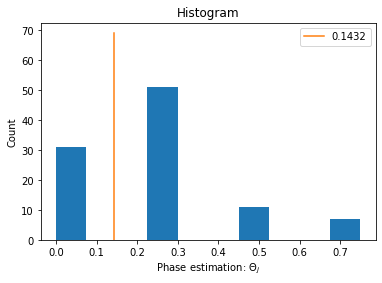

In [229]:
zlist = []
for i in range(100):
    zlist.append((QuantumSimulatorIb([(1,'001')],"c.txt")))
alist = []
for i in range(len(zlist)):
    alist.append(phaseEstimation(2,zlist[i][0][0]))
plt.hist(alist)
plt.plot([0.1432 for i in range(0,70)],range(0,70))
plt.title('Histogram')
plt.xlabel("Phase estimation: $\Theta_j$")
plt.ylabel('Count')
plt.legend(['0.1432'])
plt.show()


In [230]:
def phase_estimation_circuit_gen(num_wires,num,yes):
    top_wires = num_wires - 1
    QFT_gen_circuit(top_wires)
    with open(f'Phase_estimation_{num_wires}.txt','w') as file:
        file.write(f'{num_wires}')
        file.write('\n')
        for i in range(top_wires):
            file.write('H ')
            file.write(f'{i}')
            file.write('\n')
        file.write('CPHASE ')
        file.write(f'{num_wires-2} ')
        file.write(f'{num_wires-1} ')
        file.write(f'{num}')
        file.write('\n')
        for i in range(2,top_wires+1):
            for j in range(2**i//2):
                file.write('CPHASE ') 
                file.write(f'{top_wires-i} ')
                file.write(f'{top_wires} ')
                file.write(f'{num}')
                file.write('\n')
        Inverse = InverseQFT('QFT_'+f'{top_wires}'+'.txt')
        file.write('END')
        file.write('\n')
        for i in range(len(Inverse)):
            for j in range(len(Inverse[i])):
                file.write(Inverse[i][j])
                file.write(' ')
            file.write('\n')
        if yes == 'MEASURE':
            file.write("MEASURE")
    return 0

In [231]:
result=[]
k = np.linspace(0,2*np.pi,100,dtype='float64')
for i in range(len(k)-1):
    phase_estimation_circuit_gen(7,k[i],'MEASURE')
    result.append(QuantumSimulatorIb([(1,'0000001')],'Phase_estimation_7.txt'))


KeyboardInterrupt: 

In [71]:
hist=[]
phase_estimation_circuit_gen(7,0.9,'MEASURE')
for i in range(100):
    hist.append(QuantumSimulatorIb([(1,'0000001')],'Phase_estimation_7.txt'))

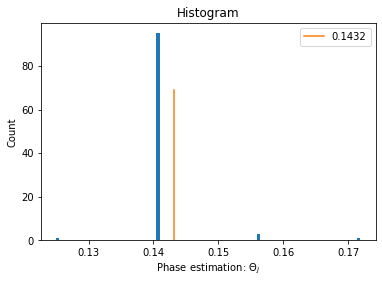

In [72]:
alist = []
for i in range(len(hist)):
    alist.append(phaseEstimation(6,hist[i][0][0]))
plt.hist(alist,bins=100)
plt.plot([0.1432 for i in range(0,70)],range(0,70))
plt.title('Histogram')
plt.xlabel("Phase estimation: $\Theta_j$")
plt.ylabel('Count')
plt.legend(['0.1432'])
plt.show()

In [73]:
thetaList = np.linspace(0,1,99)
olist = []
for i in range(len(result)):
    for j in range(len(result[i][0])):
        olist.append((abs(result[i][0][j][0])**2,phaseEstimation(6,result[i][0][j][1])))
newList = []
olist = np.array(olist)
olist = olist.reshape((99,64,2))
for i in range(len(olist)):
    res = max(olist[i],key=lambda j:j[0])
    newList.append(res[1])
plt.plot(thetaList,newList)
plt.title('$\Theta_j$ vs $\phi$/2$\pi$')
plt.ylabel('$\Theta_j$')
plt.xlabel('$\phi$/2$\pi$')

TypeError: bad operand type for abs(): 'str'

In [2101]:
phase_estimation_circuit_gen(7,0.5,'MEASURE')

0

In [74]:
zlist = []
for i in range(100):
    zlist.append((QuantumSimulatorIb([(np.sqrt(3),'0000000'),(np.sqrt(7),'0000001')],"Phase_estimation_7.txt")))
#     print(zlist[i])
alist = []
for i in range(len(zlist)):
    alist.append(phaseEstimation(6,zlist[i][0][0]))
plt.hist(alist)
plt.plot([0.1432 for i in range(0,70)],range(0,70))
plt.title('Histogram')
plt.xlabel("Phase estimation: $\Theta_j$")
plt.ylabel('Count')
plt.legend(['0.1432'])
plt.show()

[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement: 0000000')]
[('0000000', 'Circuit Measurement:

KeyboardInterrupt: 

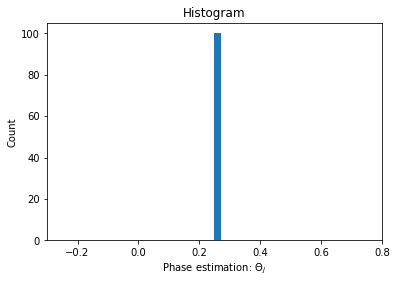

In [1742]:
plt.hist(alist,bins=50)
plt.title('Histogram')
plt.xlabel("Phase estimation: $\Theta_j$")
plt.ylabel('Count')
plt.show()

In [1717]:
phaseEstimation(7,'0101011101')

0.828125

In [1740]:
[(np.sqrt(3),'0000000'),(np.sqrt(7),'0000001')]

1.7320508075688772

In [1739]:
np.sqrt(7)

2.6457513110645907

## Quantum Simulator Ic

In [83]:
def tensor(listofMatrices):
    if len(listofMatrices) == 1:
        matrix = listofMatrices[0]
    else:
        z = scipy.sparse.kron(listofMatrices[1],listofMatrices[0],format='csr')
        if len(listofMatrices) > 2:
            for a in listofMatrices[2:]:
                z = scipy.sparse.kron(a,z,format='csr')
            matrix = z
        else:
            matrix = scipy.sparse.kron(listofMatrices[1],listofMatrices[0],format='csr')
    return matrix

def H(i, k):
    # this should apply Hadamard to wire i out of k wires
    size, matriceList = 2**k,[]
    myMatrix=np.zeros((size,size))
    #do stuff
    I = scipy.sparse.csr_matrix(scipy.sparse.identity(2,dtype='complex'))
    H = scipy.sparse.csr_matrix((1/np.sqrt(2))*np.array([[1,1],[1,-1]]))
    if i >= k:
        return f'Wire {i} does not exist in this circuit'
    for l in range(k):
        if i == l:
            matriceList.append(H)
        else:
            matriceList.append(I)
    return tensor(matriceList)

def P(i,k,theta):
    size, matriceList = 2**k,[]
    myMatrix=np.zeros((size,size))
    #do stuff
    I = scipy.sparse.csr_matrix(scipy.sparse.identity(2,dtype='complex'))
    P = scipy.sparse.csr_matrix([[1,0],[0,np.exp(1.j*theta)]])
    if i >= k:
        return f'Wire {i} does not exist in this circuit'
    for l in range(k):
        if i == l:
            matriceList.append(P)
        else:
            matriceList.append(I)
    return tensor(matriceList)

def CNOT(controlWire,otherWire,k):
    size,matriceList = 2**k,[]
    myMatrix=np.zeros((size,size))
    I = scipy.sparse.csr_matrix(scipy.sparse.identity(2,dtype='complex'))
    if controlWire < otherWire:
        H = scipy.sparse.csr_matrix([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
    else:
        H = scipy.sparse.csr_matrix([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]])
    if otherWire >= k or controlWire >= k:
        return f'Wire {i} does not exist in this circuit'
    for l in range(k):
        if controlWire == l:
            matriceList.append(H)
        elif controlWire != l and otherWire != l:
            matriceList.append(I)
    return tensor(matriceList)

def QuantumSimulatorIc(State,fileName):
    numberOfWires,myInput = ReadInput(fileName)
    matrixList = []
    newMatrix = scipy.sparse.csr_matrix(scipy.sparse.identity((2**numberOfWires),dtype='complex'))
    for i in range(len(myInput)):
        if myInput[i][0] == 'H':
            matrixList.append(H(int(myInput[i][1]),numberOfWires))
        if myInput[i][0] == 'CNOT':
            matrixList.append(CNOT(int(myInput[i][1]),int(myInput[i][2]),numberOfWires))
        if myInput[i][0] == 'P':
            matrixList.append(P(int(myInput[i][1]),numberOfWires,float(myInput[i][2])))
        if myInput[i][0] == 'INITSTATE':
            State = ReadInputState(myInput[i][2])
            
    VectorInput = scipy.sparse.csr_matrix(StateToVec(State), dtype = np.cfloat)
    
    newMatrix = VectorInput @ newMatrix
    
    for i in reversed(matrixList):
        newMatrix = newMatrix @ i
        
    for i in range(len(myInput)):
        if myInput[i][0] == 'MEASURE':
            out = Measurement(newMatrix)
        else:
            out = newMatrix
    return out

def Measurement(V):
    vectorOut = (abs(V)).power(2)
    probList = [(0,0)]
    z = 0
    for i in range(vectorOut.shape[1]):
        if vectorOut[0,i] == 0:
            continue
        z = z + vectorOut[0,i]
        probList.append((z,i))
    randomNum = np.random.uniform()
    for i in range(len(probList) - 1):
        if probList[i][0] <= randomNum <= probList[i+1][0]:
            wire= probList[i+1][1]
    return f'Circuit Measurement: {"{0:b}".format(wire)}'

In [674]:
print(QuantumSimulatorIc([(1,'00000')],'rand (1).circuit'))

  (0, 10)	(-0.07287937488524018-0.023723489712538126j)
  (0, 26)	(0.06633933187469816-0.13000168873714957j)
  (0, 8)	(0.13438171529654752+0.05121216592688404j)
  (0, 24)	(-0.11340735485796198-0.13250563694862652j)
  (0, 2)	(-0.08867677075417554+0.056676848701473506j)
  (0, 18)	(0.028080759259235467+0.07438543276078567j)
  (0, 0)	(-0.014083322515851612+0.12361700437061862j)
  (0, 16)	(-0.03459577254871694-0.21024207205339723j)
  (0, 4)	(-0.12089409718930855-0.07788291603263883j)
  (0, 20)	(0.0835693254983432+0.15308540033194834j)
  (0, 6)	(0.06640185078673151+0.03827533748905326j)
  (0, 22)	(-0.09177804927668616+0.11348187387886327j)
  (0, 12)	(0.11959567731972058-0.03429836306718312j)
  (0, 28)	(-0.1809958498973914+0.11242374597685918j)
  (0, 14)	(0.08629946269917166+0.060234853597834856j)
  (0, 30)	(0.05797555566951981-0.05441099698034318j)
  (0, 11)	(0.16616571664688456+0.12093895629751014j)
  (0, 27)	(-0.27859091059983865-0.0956475622771888j)
  (0, 9)	(-0.09107792164671298-0.0878961

## Simulator II

In [87]:
def Hadamard(inWire,instate):
    k = []
    s = ''
    for i in range(len(instate)):
        inputState = list(instate[i][1])
        for j in range(len(inputState)):
            if j == inWire:
                if inputState[j] == '0':
                    k.append((1/np.sqrt(2) * instate[i][0],s.join(inputState)))
                    inputState[j] = '1'
                    k.append((1/np.sqrt(2) * instate[i][0],s.join(inputState)))
                elif inputState[j] == '1':
                    k.append((-1/np.sqrt(2) * instate[i][0],s.join(inputState)))
                    inputState[j] = '0'
                    k.append((1/np.sqrt(2) * instate[i][0],s.join(inputState)))
        
    return k

def Phase(inwire,theta,instate):
    k = []
    s = ''
    for i in range(len(instate)):
        inputState = list(instate[i][1])
        if inputState[inwire] == '1':
            inputState[inwire] = '1'
            k.append((np.exp(1j*theta)*instate[i][0],s.join(inputState)))
        else:
            k.append((instate[i][0],instate[i][1]))
    return k

def CNOT(control,other,instate):
    k = []
    s = ''
    for i in range(len(instate)):
        inputState = list(instate[i][1])
        if inputState[control] == '1' and inputState[other] == '0':
            inputState[other] = '1'
            k.append((instate[i][0],s.join(inputState)))                         
        elif inputState[control] == '1' and inputState[other] == '1':
            inputState[other] = '0'
            k.append((instate[i][0],s.join(inputState)))
        else:
            k.append((instate[i][0],instate[i][1]))
    return k

def removeDuplicates(inputState):
    otherstate,ilist = [],[]
    for i in range(len(inputState)):
        otherstate.append(inputState[i][1])
    onlyState = list(set(otherstate))
    for i in range(len(onlyState)):
        x = 0
        for j in range(len(otherstate)):
            if otherstate[j] == onlyState[i]:
                x += inputState[j][0]
        ilist.append((x,onlyState[i]))
    return ilist

def QuantumSimulatorII(inputState,fileName):
    numberOfWires,myInput = ReadInput(fileName)
    newstate = inputState
    for i in range(len(myInput)):
        if myInput[i][0] == 'H':
            newstate = removeDuplicates(Hadamard(int(myInput[i][1]),newstate))
        if myInput[i][0] == 'CNOT':
            newstate = removeDuplicates(CNOT(int(myInput[i][1]),int(myInput[i][2]),newstate))
        if myInput[i][0] == 'P':
            newstate = removeDuplicates(Phase(int(myInput[i][1]),float(myInput[i][2]),newstate))
        if myInput[i][0] == 'INITSTATE':
            newstate = ReadInputState(myInput[i][2])
    return newstate

In [516]:
np.pi/4

0.7853981633974483

In [517]:
(QuantumSimulatorII([(1,'00000')],'input.circuit'))

[((-0.18082511268453239+0.01438104561772749j), '01000'),
 ((-0.048941996178234734-0.11635508158684055j), '10101'),
 ((-0.02131981307535495+0.08774787414090221j), '00010'),
 ((-0.02667646151394929-0.004062838923814427j), '10011'),
 ((0.21923132553221591-0.21304182634262642j), '10100'),
 ((-0.13963947717339315-0.23720129948549148j), '11000'),
 ((-0.22309649987486385+0.0746289884182196j), '01101'),
 ((-0.016746063710111725-0.13026586952891356j), '00101'),
 ((0.1847507110418059-0.005148336320294392j), '11001'),
 ((0.04895105577891031-0.03001851549580141j), '00001'),
 ((0.2231675743280913+0.05083463296709693j), '10111'),
 ((0.05382740960549368-0.06863464649457765j), '01001'),
 ((-0.007195884290384175+0.15958103150789765j), '01100'),
 ((0.024190828060211902-0.12445058311966187j), '11101'),
 ((0.11691184507936053+0.013808709741378308j), '10010'),
 ((-0.2632220901419421-0.06560050732512163j), '11010'),
 ((-0.02154097912106914+0.01744613535918265j), '01011'),
 ((-0.1116091892870344-0.2333281229

In [1581]:
QuantumSimulatorIb([(1,'011')],'QFT_test.txt')

[[((0.35355339059327373+0j), '000'),
  ((-3.925231146709437e-17-0.35355339059327373j), '001'),
  ((-0.3535533905932738+2.1648901405887335e-17j), '010'),
  ((6.090121287298171e-17+0.3535533905932738j), '011'),
  ((0.35355339059327373+0j), '100'),
  ((-3.925231146709437e-17-0.35355339059327373j), '101'),
  ((-0.3535533905932738+2.1648901405887335e-17j), '110'),
  ((6.090121287298171e-17+0.3535533905932738j), '111')]]

In [1582]:
QuantumSimulatorIa([(1,'00000')],'QFT_5.txt')

[((-0.040280172843978966-0.22092218580979778j), '00000'),
 ((0.03924518209217251+0.023910857472457456j), '00001'),
 ((0.24931113173460107+0.06424050348115712j), '00010'),
 ((-0.15343429572948342+0.03949230797429047j), '00011'),
 ((0.019060232717810804+0.0706278975188603j), '00100'),
 ((-0.0329844278039501+0.17641606612352878j), '00101'),
 ((0.032340106491623416-0.10686903340296813j), '00110'),
 ((-0.038751220470916066-0.2765494379124836j), '00111'),
 ((0.17569872128854624+0.0802118296692472j), '01000'),
 ((-0.0791140866184543+0.03393230533153974j), '01001'),
 ((-0.0002618274228851705+0.028803850675378204j), '01010'),
 ((-0.02954193710081099-0.03982329183748581j), '01011'),
 ((-0.08487408497881357-0.09667995382341463j), '01100'),
 ((-0.12285063298481397-0.25349512030285387j), '01101'),
 ((0.008280064368424267-0.14413945036550518j), '01110'),
 ((-0.047937557394301625+0.19058819747763803j), '01111'),
 ((0.053740486318704386-0.321280643607038j), '10000'),
 ((0.08398001446940684-0.093782480

## Classic Shor's

In [117]:
from math import floor,log10

In [386]:
def checkFunc(N):
    for i in range(2,floor(np.log2(N))):
        x = N**(1/i)
        if round(x, 14).is_integer() == True:
            return 1
    return 0

def Shors(N):
    if (N % 2 == 0):
        if (N // 2) % 2 == 1:
            N = N//2
        else:
            return ("Number is too even, try again!")
#         return ("Number is even, try again!")
    if (sympy.isprime(N) == True):
        return ("Number is a prime, try again!")
    if (checkFunc(N) == 1):
        return ("Number has a power, try again!")
    if (N == 1):
        return ("Try again!")
    while True:
        randNum = random.randint(1,int(N**0.5))
        if (math.gcd(randNum,N) != 1):
            continue
        r = find_period(randNum,N)
        fac = (math.gcd(((((randNum)**int(r/2)) - 1)%N),N))
        tor = (math.gcd(((((randNum)**int(r/2)) + 1)%N),N))
        if fac != 1 and tor != N and fac != N and tor != 1:
            if (N // 2) % 2 == 1:
                return print(f' Factors of {N*2}: {2,fac,tor}',f'(x,r) : {(randNum,r)}')
            else:
                return print(f' Factors of {N}: {fac,tor}',f'(x,r) : {(randNum,r)}')
        else:
            continue
    return 0 

def find_period(randNum,N):
    r = 1
    while r < N:
        if (randNum**r) % N == 1 and r % 2 !=1:
            return r
        else:
            r += 1
    return 0

In [387]:
for i in range(100):
    print(i,Shors(i))

0 Number is too even, try again!
1 Try again!
2 Try again!
3 Number is a prime, try again!
4 Number is too even, try again!
5 Number is a prime, try again!
6 Number is a prime, try again!
7 Number is a prime, try again!
8 Number is too even, try again!
9 Number has a power, try again!
10 Number is a prime, try again!
11 Number is a prime, try again!
12 Number is too even, try again!
13 Number is a prime, try again!
14 Number is a prime, try again!
 Factors of 30: (2, 3, 5) (x,r) : (2, 4)
15 None
16 Number is too even, try again!
17 Number is a prime, try again!
18 Number has a power, try again!
19 Number is a prime, try again!
20 Number is too even, try again!
 Factors of 21: (7, 3) (x,r) : (2, 6)
21 None
22 Number is a prime, try again!
23 Number is a prime, try again!
24 Number is too even, try again!
25 Number has a power, try again!
26 Number is a prime, try again!
27 Number has a power, try again!
28 Number is too even, try again!
29 Number is a prime, try again!
 Factors of 30: (

In [395]:
for i in range(0,10):
    Shors(45)

 Factors of 45: (9, 5) (x,r) : (4, 6)
 Factors of 45: (9, 5) (x,r) : (2, 12)
 Factors of 45: (9, 5) (x,r) : (2, 12)
 Factors of 45: (9, 5) (x,r) : (2, 12)
 Factors of 45: (9, 5) (x,r) : (2, 12)
 Factors of 45: (9, 5) (x,r) : (2, 12)
 Factors of 45: (9, 5) (x,r) : (2, 12)
 Factors of 45: (9, 5) (x,r) : (2, 12)
 Factors of 45: (9, 5) (x,r) : (4, 6)
 Factors of 45: (9, 5) (x,r) : (2, 12)
